<a href="https://colab.research.google.com/github/ghk829/Machine-for-Learning-Site/blob/master/BERT_%2B_SIAMESE_NEURAL_NETWORKS_Test_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERT + SIAMESE NEURAL NETWORKS Test Code

## 1. CONCEPT

![대체 텍스트](http://hugrypiggykim.com/wp-content/uploads/2019/11/대학원_2학기_인공지능_개인과제.jpg)

## (1) 문제점 : 인공지능 모델을 만들기 위해서는 많은 양의 데이터가 필요함 
## (2) 과제목표 : 자연어처리에 ONESHOT 을 적용해서 적은 데이터로 훈련해보고자 함
## (3) 접근 방법 
## &ensp;&ensp;가) 자연어 FEATURE 추출 : Pretrained BERT 를 이용 좋은 Featrue 를 추출   
## &ensp;&ensp;나) ONE-SHOT 러닝 적용 : 적은 수의 데이터로 신규 레이블 훈련할 수 있도록 함

## 가) BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding

###BERT 는 요약하면 Transformer Archtiecture 를 Unsupervised (앞뒤단어, 중간 단어 예측)학습을 통해 훈련하여, General 한 자연어 처리 문제를 해결할 수 있는 Pretrained 모델을 만들고, Transformer Architecture 의 Encoder 부분을 활용하여, 개별적인 자연어 처리 Task(분류,NER 등) 에 대해서 Single Layer 추가를 통한 Fine Tunning 만으로, 기존의 어떤 아키택쳐보다 좋은 성능을 낼 수 있다는 연구임.   


![대체 텍스트](http://hugrypiggykim.com/wp-content/uploads/2018/12/bert_001.jpg)

##Transformer Architecture 는 크게 아래와 같이 구성됨

### (A) Scaled Dot Product Attention : Transformer 에서 Self Attention 을 구성하는 방식 
### (B) Multi-Head Attention :  복수의 Scaled Dot Product Attention 을 Concat 하여, 더 나은 Attention 을 구하고자 함 
### (C) Positional Encoding : 동일한 단어라고 하여도 위치에 따라서 다른 해석을 부여 하기 위한 Encoding 
### (D) Short Cut & Layer Norm : Resnet 과 같은 Short Cut 등 을 통한 Vanising Problem 의 최소화 
### (E) Endoer Output : 분류, 요약, MRC, NER 등 다양한 문제 해결을 위한 활용

## 나) SIAMESE NEURAL NETWORKS FOR ONE-SHOT IMAGE RECOGNITION

### ONESHOT 류의 연구는 결국 모델이 잘 훈련되어 있다면, 비슷한 이미지는 모델을 통과하면 비슷한 Featrue 를 출력할 것이다라는 가정에 있으며, 이러한 가정을 가장 단순하게 적용할 수 있는 방법이 1-Nearest Neighbor 가 있을 수 있을 것이다. 보통 ONESHOT 관련 연구에서 BASE LINE 으로 많이 사용된다고 한다.  

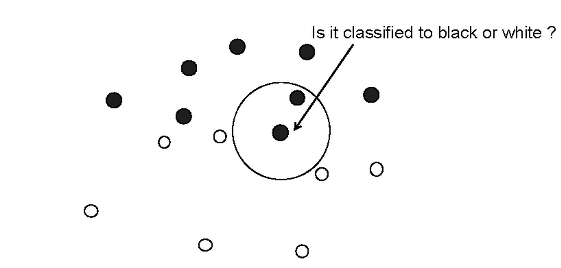

### 아래의 결과에서 보느 것처럼 단순하게 Vector 간의 거리를 통해서 Class 를 구분하는 Naive 한 방법은 이번에 사용하려고 하는 Siamese Net 대비 성능이 많이 부족한 것을 볼 수 있다.

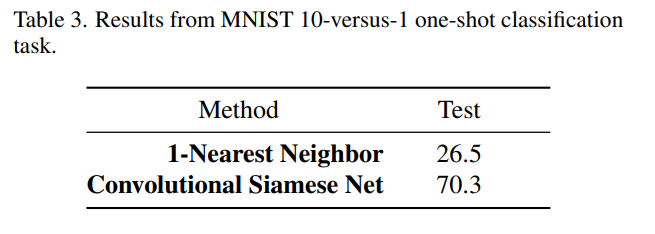

### 논문에서는 뉴럴네트워크에 두 개의 이미지를 주고 같은 카테고리인지 아닌지 판단하게 학습을 시킵니다. 그리고 학습이 끝나면 테스트 이미지를 네트워크에 집어넣고 support set 중에서 어떤 이미지가 가장 같은 카테고리에 속하는지 맞춰보게 합니다. 이를 위해 샴 네트워크(siamese neural network)는 두 개의 이미지를 각각 하나의 네트워크에 집어넣어 최종적으로 두 이미지가 같은 클래스인지에 대한 확률값이 나오게 설계되어있습니다.

![대체 텍스트](https://i1.wp.com/hugrypiggykim.com/wp-content/uploads/2018/10/siamese_fig1_strategy.png?resize=768%2C744)

##샴 넷은 위와 같은 구조를 가집니다. 각 네트워크를 거쳐 나온 4096개의 feature를 가지고 L1 norm(absolute distance)을 구합니다. 아래 식을 보면 αj는 트레이닝 과정에서 에서 자동으로 학습되는 파라미터로 각 피쳐에 대한 거리값에 곱해줍니다. σ는 시그모이드 활성함수 입니다.

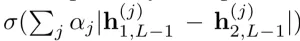

##이 값을 다시 fully connected layer를 거쳐 시그모이드 함수로 단일 값을 받아냅니다. 1이면 같은 클래스, 0이면 다른 클래스가 되는 것이죠. 여기 있는 모든 fully connected layer가 파라미터 갯수의 96%를 차지한다고 하네요. 여기서 나온 예측값과 타겟에 대하여 binary cross entropy를 이용한 로스를 구합니다. 식은 아래와 같습니다.

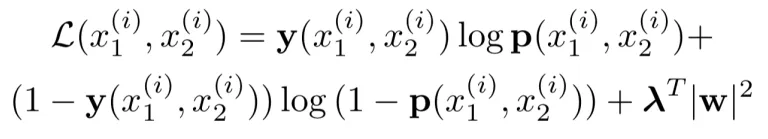

## 학습에서 사용하는 손실함수(loss function)가 위와 같다면, 실제 one-shot task를 할 때는 다음과 같은 방식으로 진행합니다. test image를 한 네트워크에 집어넣고, 다른 네트워크에는 support set에 있는 이미지를 하나씩 집어넣습니다. 여기서 가장 큰 확률값을 가지는 이미지를 같은 클래스로 분류하는 것입니다. 식은 아래와 같습니다.

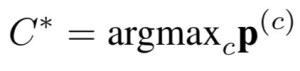

#2. Test Code

## 가) 라이브러리 IMPORT

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import torch
import torch.nn as nn
import torchvision
import numpy as np
import torchvision.transforms as T
import torch.nn.functional as F
import torchvision.models as models
import torch.tensor as tensor
from torch.optim import Adam
!pip install pytorch-pretrained-bert pytorch-nlp
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification, BertModel

     |████████████████████████████████| 133kB 5.0MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 


In [0]:
dropout = 0.7

In [0]:
# Device configuration

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('device:', device)

device: cuda


## 나) 데이터 전처리

In [0]:
def pad_sequences(data, max_sent_len=None):
    sent_lens = [len(sent) for sent in data]
    if (max_sent_len is None):
        max_sent_len = max(sent_lens)
    padded = np.zeros((len(data), max_sent_len)).astype("float32")
    mask = np.zeros((len(data), max_sent_len)).astype("float32")

    for idx in range(len(data)):
        sent = data[idx]
        padded[idx, :len(sent)] = np.asarray(list(sent)).astype("float32")
        mask[idx, :len(sent)] = 1.0
    
    return padded, mask, sent_lens

def data_preprocess(test_texts) : 
    # load bert tokenizer
    #Tokenize first sentence
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

    tokenized_test_texts = [tokenizer.tokenize(sent) for sent in test_texts]
    max_len = 256
    tokenized_test_texts = [["[CLS]"] + sent[:max_len - 2] + ["[SEP]"] for sent in tokenized_test_texts]
    #print (tokenized_test_texts[0])

    #Token ids
    test_text_inputs = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_test_texts]
    #print(test_text_inputs[0])

    # Pad Sequence
    test_text_inputs, test_mask, test_lengths = pad_sequences(test_text_inputs, max_len)
    #print(test_text_inputs[0])

    test_text_inputs = tensor(test_text_inputs, device=torch.device('cuda')).long()
    test_mask = tensor(test_mask, device=torch.device('cuda'))
    test_lengths = tensor(test_lengths, device=torch.device('cuda'))

    return test_text_inputs, test_mask, test_lengths


## 다) TEST Data for OneShot Learning and Preprocess Test

In [0]:
cls1_text = ["Most modern deep learning models are based on artificial neural networks, specifically, \
Convolutional Neural Networks (CNN)s, although they can also include propositional formulas or latent variables \
organized layer-wise in deep generative models such as the nodes in deep belief networks and deep Boltzmann machines.\
[12] In deep learning, each level learns to transform its input data into a slightly more abstract and composite representation.\
 In an image recognition application, the raw input may be a matrix of pixels; the first representational layer may abstract the \
 pixels and encode edges; the second layer may compose and encode arrangements of edges; the third layer may encode a nose and eyes;\
  and the fourth layer may recognize that the image contains a face. Importantly, a deep learning process can learn which features to \
  optimally place in which level on its own. (Of course, this does not completely eliminate the need for hand-tuning; for example, \
  varying numbers of layers and layer sizes can provide different degrees of abstraction."]

In [0]:
cls2_text = ["Google was founded in September 1998 by Larry Page and Sergey Brin while they were Ph.D. students at \
Stanford University in California. Together they own about 14 percent of its shares and control 56 percent of the \
stockholder voting power through supervoting stock. They incorporated Google as a California privately held company on September 4, \
1998, in California. Google was then reincorporated in Delaware on October 22, 2002.[12] An initial public offering (IPO) took place\
 on August 19, 2004, and Google moved to its headquarters in Mountain View, California, nicknamed the Googleplex. In August 2015, \
 Google announced plans to reorganize its various interests as a conglomerate called Alphabet Inc. Google is Alphabet's leading \
 subsidiary and will continue to be the umbrella company for Alphabet's Internet interests. Sundar Pichai was appointed CEO of Google,\
  replacing Larry Page who became the CEO of Alphabet."]

In [0]:
cls3_text = ["Apple Computer, Inc., in January 1977, and sales of its computers, including the Apple II, grew quickly. Within a few years, Jobs and Wozniak \
had hired a staff of computer designers and had a production line. Apple went public in 1980 to instant financial success. Over the next few years,\
 Apple shipped new computers featuring innovative graphical user interfaces, such as the original Macintosh in 1984, and Apple's marketing advertisements\
  for its products received widespread critical acclaim. However, the high price of its products and limited application library caused problems, as did \
  power struggles between executives. In 1985, Wozniak departed Apple amicably and remained an honorary employee,[8] while Jobs and others resigned to \
  found NeXT.[9] As the market for personal computers expanded and evolved through the 1990s, Apple lost market share to the lower-priced duopoly of\
   Microsoft Windows on Intel PC clones. The board recruited CEO Gil Amelio to what would be a 500-day charge for him to rehabilitate the financially \
   troubled company—reshaping it with layoffs, executive restructuring, and product focus. In 1997, he led Apple to buy NeXT, solving the desperately \
   failed operating system strategy and bringing Jobs back. Jobs pensively regained leadership status, becoming CEO in 2000. Apple swiftly returned to\
    profitability under the revitalizing Think different campaign, as he rebuilt Apple's status by launching the iMac in 1998, opening the retail chain \
    of Apple Stores in 2001, and acquiring numerous companies to broaden the software portfolio. In January 2007, Jobs renamed the company Apple Inc., \
    reflecting its shifted focus toward consumer electronics, and launched the iPhone to great critical acclaim and financial success. In August 2011,\
     Jobs resigned as CEO due to health complications, and Tim Cook became the new CEO. Two months later, Jobs died, marking the end of an era for the company. \
     In June 2019, Jony Ive, Apple's CDO, left the company to start his own firm, but stated he would work with Apple as its primary client."]

## 라) Train SET 으로 만들기

In [0]:
train_set = []
cls1_tensor = data_preprocess(cls1_text)
cls2_tensor = data_preprocess(cls2_text)
cls3_tensor = data_preprocess(cls3_text)
train_set.append([cls1_tensor, cls1_tensor, 1])
train_set.append([cls1_tensor, cls2_tensor, 0])
train_set.append([cls1_tensor, cls3_tensor, 0])     
train_set.append([cls2_tensor, cls2_tensor, 1])
train_set.append([cls2_tensor, cls3_tensor, 0])
train_set.append([cls3_tensor, cls3_tensor, 1])

100%|██████████| 231508/231508 [00:00<00:00, 1229922.15B/s]


## 마) BERT 및 분류 클래스 정의

In [0]:
class Classify(nn.Module):
  def __init__(self, input_size, class_num):
    super(Classify, self).__init__()
    self.fc = nn.Linear(input_size, class_num)
    self.relu = nn.ReLU()
    #self.dropout = nn.Dropout(0.7)

  def forward(self, avg_vecs):
    #final_rep = self.dropout(avg_vecs)
    #logit = self.relu(self.fc(avg_vecs))
    logit = self.fc(avg_vecs)
    return logit

class AvgVec(nn.Module):
  def __init__(self):
    super(AvgVec, self).__init__()

  def forward(self, hidden_states, mask):
    last_layer = hidden_states[-1]
    input_vecs = last_layer
    
    sum_vecs = (input_vecs * mask.unsqueeze(-1)).sum(1)
    avg_vecs = sum_vecs / mask.sum(1, keepdim=True)
    return avg_vecs

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.bert_encoder = BertModel.from_pretrained("bert-base-uncased")
        self.avg_vec = AvgVec()
        self.classification_model = Classify(self.bert_encoder.config.hidden_size, 2)
          
    def forward(self, input_ids_1, input_mask_1, input_ids_2, input_mask_2):
        self.bert_encoder.eval()
        encoder_layer_1, pooled_output_1 = self.bert_encoder(input_ids_1, token_type_ids=None, attention_mask=input_mask_1)
        encoder_layer_2, pooled_output_2 = self.bert_encoder(input_ids_2, token_type_ids=None, attention_mask=input_mask_2)

        out1 = self.avg_vec(encoder_layer_1, input_mask_1)
        out2 = self.avg_vec(encoder_layer_2, input_mask_2)w
        out_norm = diff = torch.abs(out1 - out2)
        logit = self.classification_model(out_norm)
        softmax = F.softmax(logit, dim=1)
        return logit, softmax
model = Model()

100%|██████████| 407873900/407873900 [00:11<00:00, 35494993.59B/s]


## 바) TRAIN 및 TEST Function

In [0]:
def train(model, data_set, batch_size=1, iter=4):
    model.cuda()
    model.train()

    optimizer = Adam(model.classification_model.parameters(), lr=0.1)

    loss_total = 0.0
    trial = 0
    for _ in range(iter) : 
        for data in data_set:
            logit, _ = model(data[0][0], data[0][1], 
                            data[1][0], data[1][1])
            y  = tensor([data[2]]).cuda()
            loss_func = torch.nn.CrossEntropyLoss() 
            loss = loss_func(logit, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_total += loss.item()
            trial += 1
                
        print("loss : ", loss_total/trial)
    return None

train(model, train_set)

loss :  0.4265858431657155
loss :  0.3218029613296191
loss :  0.25795748829841614
loss :  0.21271037558714548


## 사) 훈련된 ONESHOT 모델을 테스트

In [0]:
def test_oneshot(text) : 
    model.eval()

    prob_list = []
    for idx, target in enumerate([cls1_text, cls2_text, cls3_text]) :
        # model.classification_model.eval()
        x1_hidden = data_preprocess(test)[0].cuda()
        x1_mask = data_preprocess(test)[1].cuda()

        x2_hidden = data_preprocess(target)[0].cuda()
        x2_mask = data_preprocess(target)[1].cuda()

        p = model(x1_hidden, x1_mask, x2_hidden, x2_mask)[1][0][1]
        prob_list.append(p)
        print("Prob of {0} : {1}".format(idx, p))

    print(np.argmax(prob_list))

###CASE1 : 구글에 대한 기사 (한번도 훈련한적 없는 데이터) => 구글에 대한 글이라고 잘 맞춤

In [0]:
test = ["Google's roots go back to 1995 when two graduate students, Sergey Brin and Larry Page, met at Stanford University.\
 In 1996, Brin and Page collaborated on a research project that was to eventually become the Google search engine. BackRub,\
  as it was called then (because of its analysis of back links), stirred up interest in the university research community,\
   but didn't garner any offers from the major portal vendors. Those were early days in terms of mass searching of the Internet; \
   one of the CEOs who turned them away said that users don't really care about search abilities. Undaunted, the founders scrounged up\
    enough funding to get started, and in September of 1998 began operations from a garage-based office in Menlo Park, California. \
    In December of that same year, PC Magazine listed Google as one of its Top 100 Web Sites and Search Engines for 1998."]

In [0]:
test_oneshot(test)

Prob of 0 : 0.0
Prob of 1 : 1.3584292242393785e-35
Prob of 2 : 9.651833160004993e-36
1


###CASE2 : 애플 대한 기사 (한번도 훈련한적 없는 데이터) => 애플에 대한 글이라고 잘 맞춤

In [0]:
test = ["The history of the iPhone began with a request from Apple Inc. CEO Steve Jobs to the company's engineers, asking them to\
 investigate the use of touchscreen devices and tablet computers (which later came to fruition with the iPad).[1][2][3][4] Many \
 have noted the device's similarities to Apple's previous touch-screen portable device, the Newton MessagePad.[5][6][7][8] Like the\
  MessagePad, the iPhone is nearly all screen. Its form factor is credited to Apple's Chief Design Officer, Jonathan Ive.[3][9] The \
  iPhone beta was created in 2004 to test the commands of the Apple team, and while technically may have first iPhone ever created, \
  it was never released to the public, so this beta was not considered the true first iPhone. After some trial and error, the first \
  iPhone was officially launched and made accessible to the public in 2007, and this iPhone and was advertised noticeably at the Macworld\
   of that same year. In this first release, the iPhone was accessible in the US, UK, Canada, Germany, Norway, Sweden, Finland, France, \
   Spain, Italy and South Africa. Jobs expressed his belief that tablet PCs and traditional PDAs were not good choices as high-demand \
   markets for Apple to enter, despite receiving many requests for Apple to create another PDA. He believed that cell phones were going\
    to become important devices for portable information access, and that mobile phones needed to have excellent synchronization software. \
    At that time, instead of focusing on a follow-up to their Newton PDA, Jobs had Apple focus on the iPod. Jobs also had Apple develop \
    the iTunes software, which can be used to synchronize content with iPod devices. iTunes was released in January 2001.[10][11][12][13] \
    On September 7, 2005, Apple and Motorola released the ROKR E1, the first mobile phone to use iTunes. Jobs was unhappy with the ROKR,\
     feeling that having to compromise with a non-Apple designer (Motorola) prevented Apple from designing the phone they wanted to make.\
     [14] The iPhone that was launched in 2004 was a starting point for Apple to learn more about the phone's capabilities before the public. \
     In September 2006, Apple discontinued support for the ROKR, and released a version of iTunes that included references to an as-yet \
     unknown mobile phone that could display pictures and video.[15]"]

In [0]:
test_oneshot(test)

Prob of 0 : 0.0
Prob of 1 : 4.912167688782787e-40
Prob of 2 : 3.827405588474411e-35
2


###CASE3 : 딥러닝에 대한 기사 (한번도 훈련한적 없는 데이터) => 딥러닝에 대한 글이라고 잘 맞춤

In [0]:
test = ["Deep learning can be considered as a subset of machine learning. It is a field that is based on learning and improving on its own by examining computer algorithms. \
While machine learning uses simpler concepts, deep learning works with artificial neural networks, which are designed to imitate how humans think and learn. Until recently, \
neural networks were limited by computing power and thus were limited in complexity. However, advancements in big data analytics have permitted larger, sophisticated neural \
networks, allowing computers to observe, learn, and react to complex situations faster than humans. Deep learning has aided image classification, language translation, speech \
recognition. It can be used to solve any pattern recognition problem and without human intervention."]

In [0]:
test_oneshot(test)

Prob of 0 : 8.47596501001475e-36
Prob of 1 : 0.0
Prob of 2 : 0.0
0
